In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.datasets import make_blobs

In [2]:
x_data, y_data = make_blobs(n_samples=500, centers = 5, shuffle=True, random_state=10)

print (x_data.shape, y_data.shape)

(500, 2) (500,)


In [3]:
print (x_data [0:10])

print (y_data [0:10])

[[ -7.32786741   4.23641465]
 [  1.12565931   6.32088416]
 [ -0.49239887  -5.28550826]
 [ -7.12432134   6.16236021]
 [  2.38696269   4.11331935]
 [  6.55519802 -10.28277104]
 [ -4.60484127   4.27470475]
 [ -1.27010839  -6.55718306]
 [  5.77989048  -9.7922405 ]
 [ -7.72699176  -9.47166311]]
[3 1 2 3 1 0 3 2 0 4]


In [4]:
df_cluster = np.unique(y_data)

print (df_cluster)

[0 1 2 3 4]


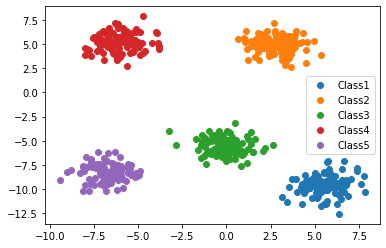

In [5]:
for c in df_cluster: 
    plt.scatter(x_data[y_data == c, 0], x_data[y_data==c, 1], label ='Class{}'.format(c+1))
plt.legend()
plt.show()

# Hierarchical agglomerative clustering

In [6]:
h_clustering = AgglomerativeClustering(
    linkage = 'complete',
    affinity = 'euclidean',
    distance_threshold = 5, 
    n_clusters = None)

#blobs_clusters = h_clustering.fit_predict(blobs_x)
h_clustering_pred = h_clustering.fit_predict(x_data)

In [7]:
print (np.unique(y_data))

print (np.unique(h_clustering_pred))

[0 1 2 3 4]
[0 1 2 3 4 5 6 7]


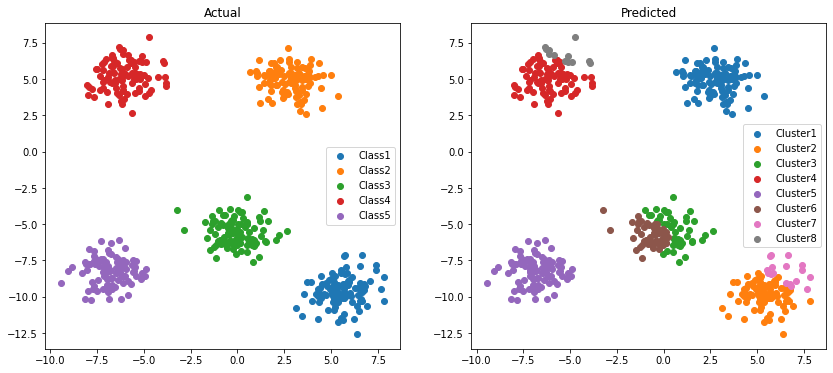

In [8]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('Actual')
for c in np.unique(y_data): 
    plt.scatter(x_data[y_data == c, 0], x_data[y_data==c, 1], label ='Class{}'.format(c+1))
plt.legend()

plt.subplot(1,2,2)
plt.title('Predicted')
for c in np.unique(h_clustering_pred): 
    plt.scatter(x_data[h_clustering_pred == c, 0], x_data[h_clustering_pred==c, 1], label ='Cluster{}'.format(c+1))
plt.legend()
plt.show()

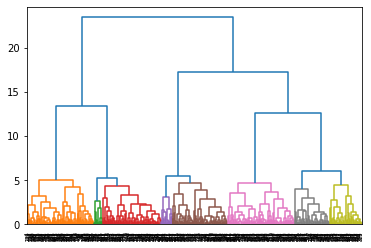

In [9]:
linkage_matrix = linkage(x_data, method = 'complete', metric = 'euclidean') 
_ = dendrogram(linkage_matrix, color_threshold = 5) 

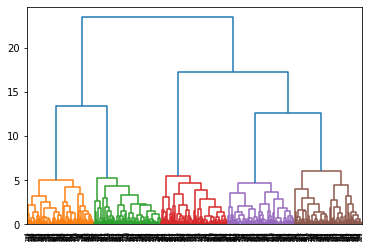

In [10]:
_ = dendrogram(linkage_matrix, color_threshold = 10)

In [11]:
# hyperparameter change

h_clustering = AgglomerativeClustering(
    linkage = 'complete',
    affinity = 'euclidean',
    distance_threshold = 10, 
    n_clusters = None)

h_clustering_pred = h_clustering.fit_predict(x_data)

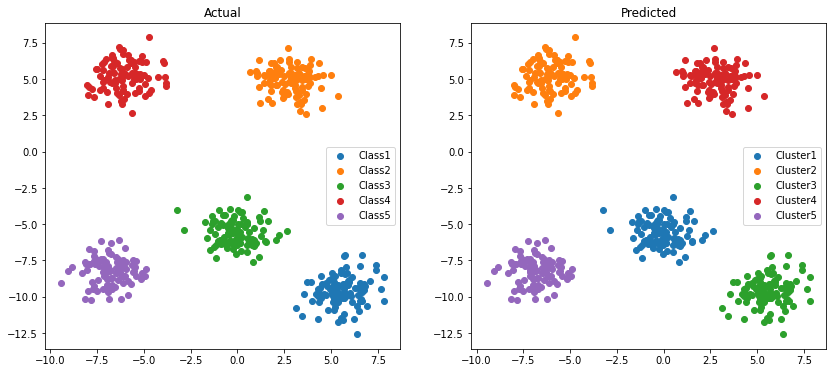

In [12]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('Actual')
for c in np.unique(y_data): 
    plt.scatter(x_data[y_data == c, 0], x_data[y_data==c, 1], label ='Class{}'.format(c+1))
plt.legend()

plt.subplot(1,2,2)
plt.title('Predicted')
for c in np.unique(h_clustering_pred): 
    plt.scatter(x_data[h_clustering_pred == c, 0], x_data[h_clustering_pred==c, 1], label ='Cluster{}'.format(c+1))
plt.legend()
plt.show()